# Dataset 1
## Importing the data

In [6]:
import numpy as np
import pandas as pd
import sklearn as sk
import statistics as st
from sklearn import neighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
# Adult dataset
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
       'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

#convert 
missing_values = [' ?', '?']
data_df = pd.read_csv(r'F:\COMP551\final\Adult Dataset\adult.data',header=None,na_values = missing_values,names = header)
test_df = pd.read_csv(r'F:\COMP551\final\Adult Dataset\adult.test',header = None,na_values = missing_values,names = header)

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [9]:
# Check  data type
test_obj= []
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_obj.append(col)
print(test_obj)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']


In [10]:
# handle test datase

# Male = 1, Female = 0
test_df["sex"] = np.where(test_df.sex == ' Male', 1, 0)
# Salary > 50K = 1, < 50K = 0
test_df["salary"] = np.where(test_df.salary == ' >50K', 1 , 0)

# Check  data type
test_obj= []
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_obj.append(col)
print(test_obj)

test_names = test_df.columns.tolist()

# Get dummy variables for categorical vars
workclass = pd.get_dummies(test_df['workclass'])
education = pd.get_dummies(test_df['education'])
marital_status = pd.get_dummies(test_df['marital-status'])
occupation = pd.get_dummies(test_df['occupation'])
relationship = pd.get_dummies(test_df['relationship'])
race = pd.get_dummies(test_df['race'])
sex = pd.get_dummies(test_df['sex'])
country = pd.get_dummies(test_df['native-country'])
salary = pd.get_dummies(test_df['salary'])


# Map variable to predict
dict_map = dict()
y_map = {' >50K':1,' <=50K':0}
dict_map['salary'] = y_map
test_df = test_df.replace(dict_map)
label = test_df['salary']

# Quantitative features
test_quantit = [i for i in test_names if i not in test_obj]
print(test_quantit)


test_quantit
df_test = test_df[test_quantit]
df_test_names = df_test.keys().tolist()

# Scale quantitative variables
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_test)
df_test = pd.DataFrame(x_scaled)
df_test.columns = df_test_names


# Get final df
test_final = pd.concat([df_test,
                      workclass,
                      education,
                      marital_status,
                      occupation,
                      relationship,
                      race,
                      sex,
                      country,
                      salary,
                      label], axis=1)

test_final.head()

test_data = test_final.to_numpy()
print(test_data)


['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']
[[0.10958904 0.14443012 0.4        ... 0.         1.         0.        ]
 [0.28767123 0.05167688 0.53333333 ... 0.         1.         0.        ]
 [0.15068493 0.21901093 0.73333333 ... 0.         1.         0.        ]
 ...
 [0.28767123 0.24476203 0.8        ... 0.         1.         0.        ]
 [0.36986301 0.04766648 0.8        ... 0.         1.         0.        ]
 [0.24657534 0.11419533 0.8        ... 0.         1.         0.        ]]


In [262]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#number of rows x number of columns
print('shape:',data_df.shape)
data_df.head()

shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# # Check all entries if there are invalid data
# for col in data_df.columns:
#   if data_df[col].dtype == "object":
#     print('Attribute name:',col)
#     print(data_df[col].value_counts())
#     print('\n')

# Data Cleaning

In [6]:
# Create a copy of the dataframe(checkpoint_1) before dropna
df = data_df.copy(deep = True)

In [7]:
# drop invalid data rows
# ? is already converted to Nan while reading_csv
df = df.dropna()
print(df.shape)

(30162, 15)


In [8]:
#check all is dropped
null_data = df.iloc[:,:-1]
null_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

# Visualization

(Might need to do for other types too)

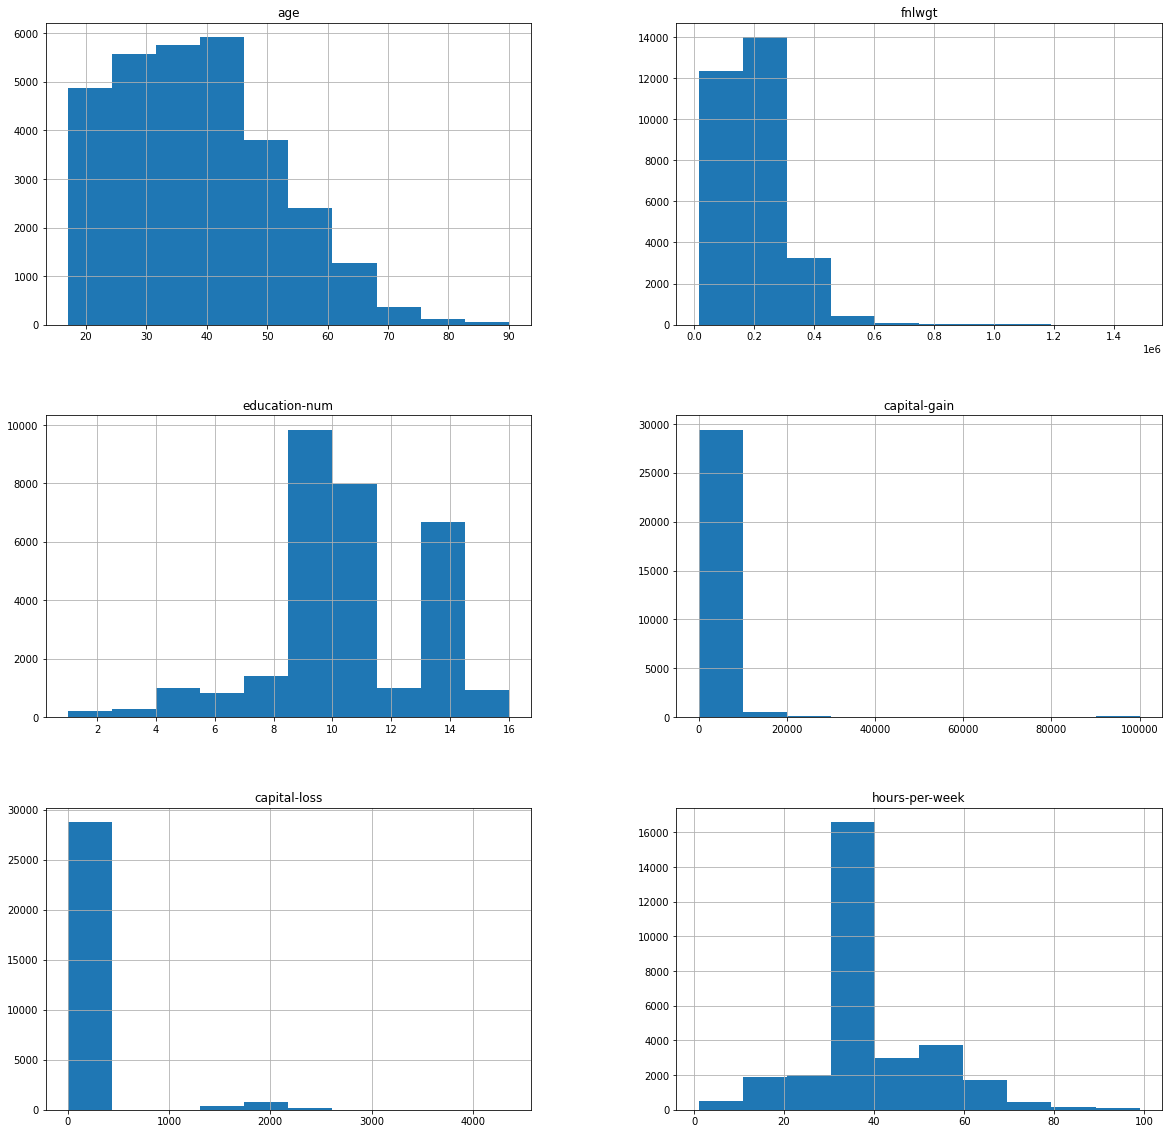

In [9]:
# a histogram display the adult data with 
# y-axis = number of people and
# x-axis = value of feature

p = df.hist(figsize = (20,20))

In [10]:
#...

# Encoding

In [11]:
# Create copies of dataset(checkpoint_2) before conveting 
df_copy = df.copy(deep = True)

In [13]:
# Converting 'sex' and 'salary' to binary

print('sex:\n',df_copy["sex"].value_counts())
print('salary:\n',df_copy["salary"].value_counts())

# Male = 1, Female = 0
df_copy["sex"] = np.where(df.sex == ' Male', 1, 0)
# Salary > 50K = 1, < 50K = 0
df_copy["salary"] = np.where(df.salary == ' >50K', 1 , 0)

sex:
  Male      20380
 Female     9782
Name: sex, dtype: int64
salary:
  <=50K    22654
 >50K      7508
Name: salary, dtype: int64


In [14]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [ ]:
# Since in the previous check, the adult dataset only contains object and int types
# Here we divided our features into two types: categorical features and quantitative features

In [15]:
# Check int data type
int_col= []
for col in df_copy.columns:
    if df_copy[col].dtype == 'int64' or df_copy[col].dtype == 'int32':
        int_col.append(col)
print(int_col)

['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


In [16]:
# Check object data type
obj_col= []
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        obj_col.append(col)
print(obj_col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


### categorical features

#### one hot encoding

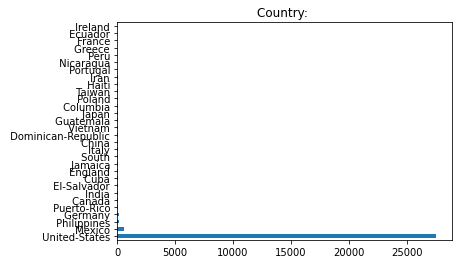

In [17]:
%matplotlib inline

plt.title('Country: ')
(df_copy['native-country']
     .value_counts()
      .head(30)
     .plot(kind='barh'))

plt.show()

In [ ]:
# here we can see doing one hot encoding is not a really good idea since most of our data sample are from states

In [26]:
# quantitative_subset = df_copy.select_dtypes('number')
categorical_subset = df_copy.select_dtypes('object')

#hence we drop country col 
categorical_subset_ohe = categorical_subset.drop('native-country',1)

In [27]:
categorical_subset_ohe.head()

,workclass,education,marital-status,occupation,relationship,race
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black


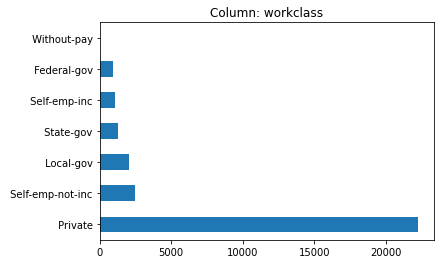

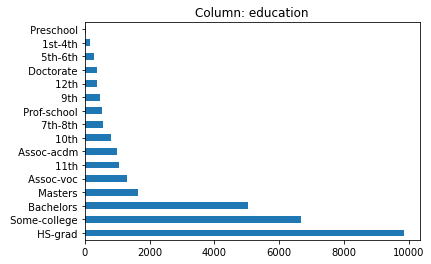

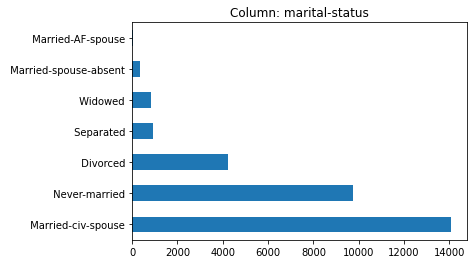

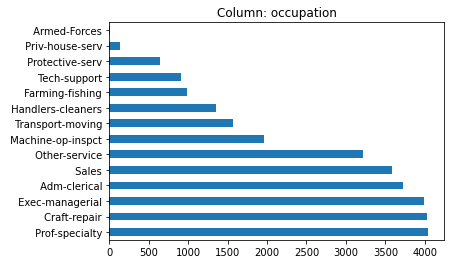

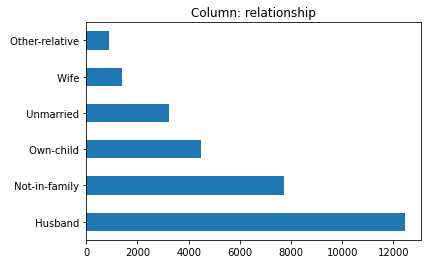

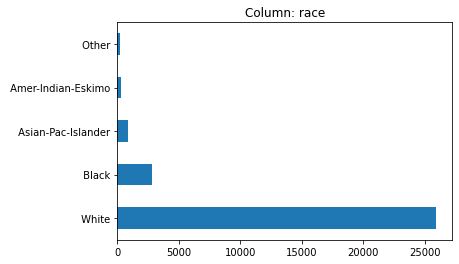

In [28]:
for idx, colname in enumerate(categorical_subset_ohe):
    
    plt.title('Column: ' + colname)
    (df_copy[colname]
        .value_counts()
        .head(30)
        .plot(kind='barh'))

    plt.show()

In [29]:
# check and we are good 
categorical_subset_ohe = pd.get_dummies(categorical_subset_ohe[categorical_subset_ohe.columns])
categorical_subset_ohe.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Ordinal Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

categorical_subset_ord = categorical_subset.copy(True)

for col in categorical_subset_ord.columns[:]:
    if categorical_subset_ord[col].dtype == "object":
        categorical_subset_ord[col] = ord_enc.fit_transform(categorical_subset_ord[[col]])
        
categorical_subset_ord.head()

,workclass,education,marital-status,occupation,relationship,race,native-country
0,5.0,9.0,4.0,0.0,1.0,4.0,38.0
1,4.0,9.0,2.0,3.0,0.0,4.0,38.0
2,2.0,11.0,0.0,5.0,1.0,4.0,38.0
3,2.0,1.0,2.0,5.0,0.0,2.0,38.0
4,2.0,9.0,2.0,9.0,5.0,2.0,4.0


### Quantitive Features

#### StandardScalar

In [46]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
df_int_std = pd.DataFrame(std_scaler.fit_transform(df_copy[int_col]), columns=int_col)
df_int_std.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,0.042796,-1.062722,1.128918,0.692806,0.146092,-0.218586,-0.077734,-0.575691
1,0.880288,-1.007871,1.128918,0.692806,-0.147445,-0.218586,-2.331531,-0.575691
2,-0.033340,0.244693,-0.439738,0.692806,-0.147445,-0.218586,-0.077734,-0.575691
3,1.108695,0.425240,-1.224066,0.692806,-0.147445,-0.218586,-0.077734,-0.575691
4,-0.794697,1.406658,1.128918,-1.443405,-0.147445,-0.218586,-0.077734,-0.575691


#### Min_max

In [44]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_int_nrm = pd.DataFrame(min_max_scaler.fit_transform(df_copy[int_col]), columns=int_col)
df_int_nrm.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,0.301370,0.043338,0.800000,1.0,0.02174,0.0,0.397959,0.0
1,0.452055,0.047277,0.800000,1.0,0.00000,0.0,0.122449,0.0
2,0.287671,0.137244,0.533333,1.0,0.00000,0.0,0.397959,0.0
3,0.493151,0.150212,0.400000,1.0,0.00000,0.0,0.397959,0.0
4,0.150685,0.220703,0.800000,0.0,0.00000,0.0,0.397959,0.0


In [50]:
# Insert id column to different datasets
df_int_std.insert(0, 'id', range(0, 0 + len(df_int_std)))
df_int_nrm.insert(0, 'id', range(0, 0 + len(df_int_nrm)))
categorical_subset_ohe.insert(0, 'id', range(0, 0 + len(categorical_subset_ohe)))
categorical_subset_ord.insert(0, 'id', range(0, 0 + len(categorical_subset_ord)))


In [96]:
df_int_std.shape

(30162, 9)

In [97]:
categorical_subset_ohe.shape

(30162, 56)

In [ ]:
#Choose conbinations

In [98]:
# Merge datasets
df_feature = pd.merge(df_int_std,categorical_subset_ohe, on=["id"])

# Show the the tope 5 obersrvation of the dataset
df_feature.head(5)

,id,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0.042796,-1.062722,1.128918,0.692806,0.146092,-0.218586,-0.077734,-0.575691,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0.880288,-1.007871,1.128918,0.692806,-0.147445,-0.218586,-2.331531,-0.575691,0,...,0,0,0,0,0,0,0,0,0,1
2,2,-0.033340,0.244693,-0.439738,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,...,1,0,0,0,0,0,0,0,0,1
3,3,1.108695,0.425240,-1.224066,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,...,0,0,0,0,0,0,0,1,0,0
4,4,-0.794697,1.406658,1.128918,-1.443405,-0.147445,-0.218586,-0.077734,-0.575691,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
#drop id column
df_feature.drop('id',axis='columns', inplace=True)

In [33]:
df_feature.head(5)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042796,-1.062722,1.128918,0.692806,0.146092,-0.218586,-0.077734,-0.575691,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880288,-1.007871,1.128918,0.692806,-0.147445,-0.218586,-2.331531,-0.575691,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033340,0.244693,-0.439738,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1.108695,0.425240,-1.224066,0.692806,-0.147445,-0.218586,-0.077734,-0.575691,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.794697,1.406658,1.128918,-1.443405,-0.147445,-0.218586,-0.077734,-0.575691,0,0,...,0,0,0,0,1,0,0,1,0,0


In [34]:
#Convert to numpy
data = df_feature.to_numpy()
data.dtype

dtype('float64')

# KNN K-fold Cross Validation

In [123]:
def split(dataset, folds):
    return np.array_split(dataset, folds)

In [124]:
def KNN_cross_validation(dataset, folds, K):
    
    best_acc = 0
    best_config = 0
    best_model = neighbors.KNeighborsClassifier(n_neighbors=1)
    
    for k in np.arange(1,K):

        model = neighbors.KNeighborsClassifier(n_neighbors=k)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)

            # model.fit(training[:,:14], training[:,14])
            # pred = model.predict(validation[:,:14])
            # acc = np.sum(pred == validation[:,14])/len(validation[:,14])
            # acc_l += acc

            model.fit(training[:,:-1],training[:,-1])
            pred = model.predict(validation[:,:-1])
            acc = np.mean(pred == validation[:,-1])
            acc_l.append(acc)

        acc_m = st.mean(acc_l)
        
        if best_acc < acc_m:
            best_acc = acc_m
            best_config = k
            best_model = model

    return  best_acc, best_config, best_model

# Decision Tree K-fold Cross Validation

In [125]:
from sklearn.tree import DecisionTreeClassifier

def DT_cross_validation(dataset, folds, depth):
    
    best_acc = 0
    best_config = 0
    best_model = DecisionTreeClassifier(max_depth=1)

    for d in np.arange(1,depth):

        model = DecisionTreeClassifier(max_depth=d)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)
        
            model.fit(training[:,:-1],training[:,-1])
            pred = model.predict(validation[:,:-1])
            acc = np.mean(pred == validation[:,-1])
            acc_l.append(acc)

        acc_m = st.mean(acc_l)

        if best_acc < acc_m:
                best_acc = acc_m
                best_config = d
                best_model = model
    
    return  best_acc, best_config, best_model


# Trainning - Dataset 1

In [38]:
size = data.shape[0]

size20 = int(size * 0.2)

size40 = int(size * 0.4)

size60 = int(size * 0.6)

size80 = int(size * 0.8)

In [39]:
%%time

acc1, config1, KNN_model1 = KNN_cross_validation(data[:size20], 5, 20)
print(acc1, config1, KNN_model1)

0.8988391376451078 8 KNeighborsClassifier(n_neighbors=8)
Wall time: 16.2 s


In [40]:
pred = KNN_model1.predict(data[size20:,:-1])
acc = np.mean(pred == data[size20:,-1])
print(acc)

0.8914214670534604


In [ ]:
acc2, config2, KNN_model2 = KNN_cross_validation(data[:size40], 5, 20)
print(acc2, config2, KNN_model2)

In [ ]:
pred = KNN_model2.predict(data[size40:,:14])
acc = np.mean(pred == data[size40:,14])
print(acc)

In [ ]:
acc3, config3, KNN_model3 = KNN_cross_validation(data[:size60], 5, 20)
print(acc3, config3, KNN_model3)

In [ ]:
pred = KNN_model3.predict(data[size60:,:14])
acc = np.mean(pred == data[size60:,14])
print(acc)

In [146]:
%%time
acc4, config4, KNN_model4 = KNN_cross_validation(data[:size80], 5, 20)
print(acc4, config4, KNN_model4)

0.9991710875331565 2 KNeighborsClassifier(n_neighbors=2)
Wall time: 7min 26s


In [147]:
pred = KNN_model4.predict(data[size80:,:-1])
acc = np.mean(pred == data[size80:,-1])
print(acc)

ValueError: Found array with 0 sample(s) (shape=(0, 103)) while a minimum of 1 is required.

In [66]:
dtacc1, dtconfig1, dtmodel1 = DT_cross_validation(data[:size20], 5, 15)
print(dtacc1, dtconfig1, dtmodel1)

0.9991708126036484 1 DecisionTreeClassifier(max_depth=1)


In [ ]:
pred = dtmodel1.predict(data[size20:,:14])
acc = np.mean(pred == data[size20:,14])
print(acc)

In [ ]:
dtacc2, dtconfig2, dtmodel2 = DT_cross_validation(data[:size40], 5, 15)
print(dtacc2, dtconfig2, dtmodel2)

In [ ]:
pred = dtmodel2.predict(data[size40:,:14])
acc = np.mean(pred == data[size40:,14])
print(acc)

In [ ]:
dtacc3, dtconfig3, dtmodel3 = DT_cross_validation(data[:size60], 5, 15)
print(dtacc3, dtconfig3, dtmodel3)

In [ ]:
pred = dtmodel3.predict(data[size60:,:14])
acc = np.mean(pred == data[size60:,14])
print(acc)

In [ ]:
dtacc4, dtconfig4, dtmodel4 = DT_cross_validation(data[:size80], 5, 15)
print(dtacc4, dtconfig4, dtmodel4)

In [ ]:
pred = dtmodel4.predict(data[size80:,:14])
acc = np.mean(pred == data[size80:,14])
print(acc)

# Trainning - Dataset 2

In [234]:
# Load data
df_2 = pd.read_csv('C:/Jiayang/JupyterLab/Comp_551/mini_project_1/bank-additional-full.csv', sep = ";")

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [235]:
df_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [236]:
null_data_2 = df_2.iloc[:,:-1]
null_data_2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [237]:
df_copy_2 = df_2.copy(deep = True)

In [238]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [243]:
# Categorical features
categs= []
for col in df_copy_2.columns:
    if df_copy_2[col].dtype == 'object':
        categs.append(col)
        
# categs.append('y')
# print(categs)

var_names = df_copy_2.columns.tolist()
# Quantitative features
quantit = [i for i in var_names if i not in categs]
print(quantit)



['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [244]:
categs_df = df_copy_2[categs]
categs_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [241]:
# #handle uncontious data
# dict_map = dict()
# y_map = {'yes':1,'no':0}
# dict_map['y'] = y_map
# categs_df = categs_df.replace(dict_map)
# label = categs_df['y']

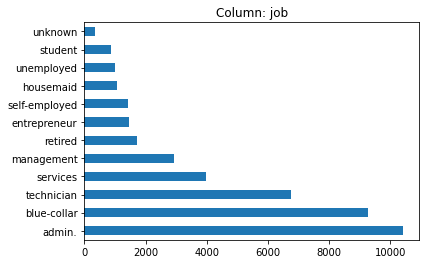

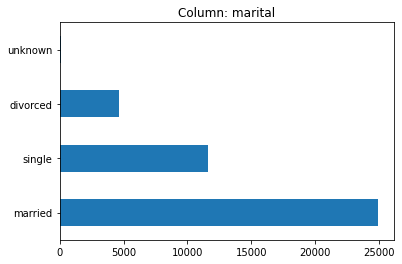

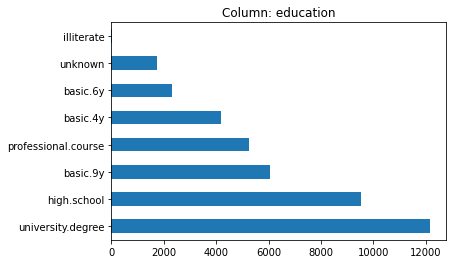

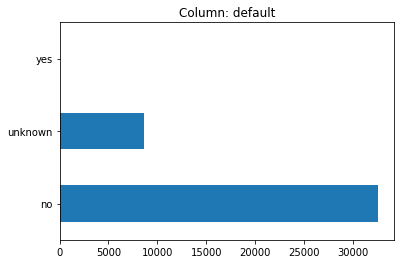

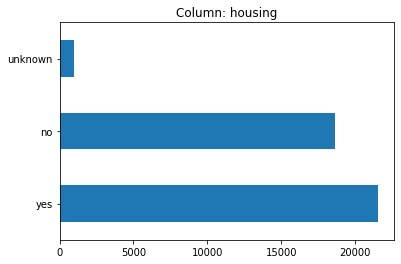

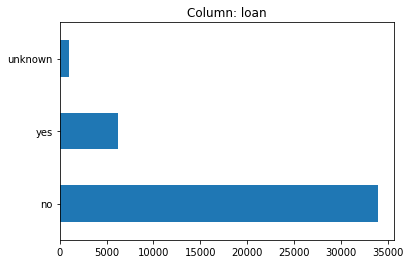

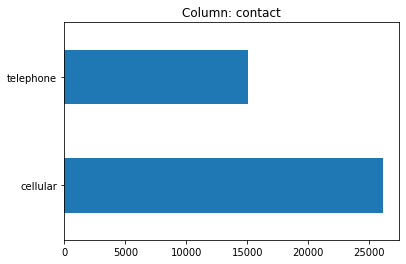

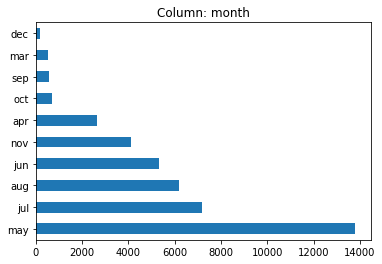

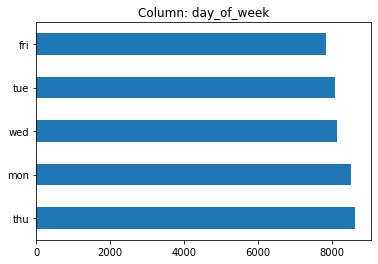

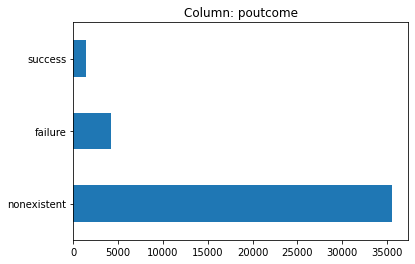

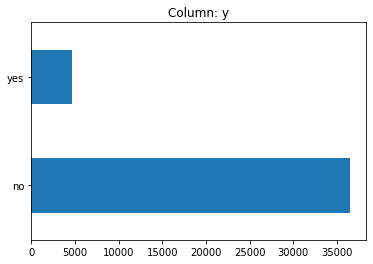

In [245]:
for idx, colname in enumerate(categs_df):
    plt.title('Column: ' + colname)
    (categs_df[colname]
        .value_counts()
        .head(30)
        .plot(kind='barh'))

    plt.show()

In [246]:
categs_df_ohe = pd.get_dummies(categs_df[categs_df.columns])
categs_df_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [247]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

categs_df_ord = categs_df.copy(True)

for col in categs_df_ord.columns[:]:
    if categs_df_ord[col].dtype == "object":
        categs_df_ord[col] = ord_enc.fit_transform(categs_df_ord[[col]])
        
categs_df_ord.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,0.0


In [248]:
quantit_df = df_copy_2[quantit]

In [249]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
quantit_df_std = pd.DataFrame(std_scaler.fit_transform(quantit_df), columns=quantit)
quantit_df_std.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [250]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

quantit_df_nrm = pd.DataFrame(min_max_scaler.fit_transform(quantit_df), columns=quantit)
quantit_df_nrm.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [251]:
categs_df_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [252]:
quantit_df_nrm.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [253]:
categs_df_ohe.shape

(41188, 55)

In [254]:
quantit_df_std.shape

(41188, 10)

In [255]:
#choose conbination
# Get final df

# Insert id column to different datasets
categs_df_ohe.insert(0, 'id', range(0, 0 + len(categs_df_ohe)))
categs_df_ohe.insert(0, 'id', range(0, 0 + len(categs_df_ohe)))
quantit_df_std.insert(0, 'id', range(0, 0 + len(quantit_df_std)))
quantit_df_nrm.insert(0, 'id', range(0, 0 + len(quantit_df_nrm)))

# Merge datasets
final_df_2 = pd.merge(categs_df_ohe,quantit_df_std, on=["id"])

# # Show the the tope 5 obersrvation of the dataset
# df_feature.head(5)
# final_df_2 = pd.concat([categs_df_ohe,quantit_df_nrm], axis=1)

ValueError: cannot insert id, already exists

In [256]:
# Quick check
final_df_2.head()

,id,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,0,1,0,0,0,0,0,...,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
1,1,0,0,0,0,0,0,0,1,0,...,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
2,2,0,0,0,0,0,0,0,1,0,...,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
3,3,1,0,0,0,0,0,0,0,0,...,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
4,4,0,0,0,0,0,0,0,1,0,...,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309


In [257]:
data2 = final_df_2.to_numpy()

In [258]:
size = data2.shape[0]

size20 = int(size * 0.2)

size40 = int(size * 0.4)

size60 = int(size * 0.6)

size80 = int(size * 0.8)

In [259]:
%%time

acc1, config1, KNN_model1 = KNN_cross_validation(data2[:size20], 5, 20)
print(acc1, config1, KNN_model1)

ValueError: Unknown label type: 'continuous'

In [127]:
pred = KNN_model1.predict(data2_try[size20:,:-1])
acc = np.mean(pred == data2_try[size20:,-1])
print(acc)

NameError: name 'KNN_model1' is not defined

In [135]:
size = data2.shape[0]

size20 = int(size * 0.2)

size40 = int(size * 0.4)

size60 = int(size * 0.6)

size80 = int(size * 0.8)

In [136]:
%%time

acc1, config1, KNN_model1 = KNN_cross_validation(data2[:size20], 5, 20)
print(acc1, config1, KNN_model1)

0.9587128111718276 2 KNeighborsClassifier(n_neighbors=2)
Wall time: 27.9 s


In [137]:
pred = KNN_model1.predict(data2[size20:,:-1])
acc = np.mean(pred == data2[size20:,-1])
print(acc)

0.8673484871475827


AttributeError: 'numpy.ndarray' object has no attribute 'to_dataframe'